## Vetores - Parte 1

### Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Criando e Visualizando Vetores

> Os vetores são a base de toda a álgebra linear.

Na Álgebra Linear, um vetor é uma lista ordenada de números. (Na Álgebra Linear abstrata, eles também podem conter outros objetos matemáticos, incluindo funções).

Vetores possuem muitas características importantes. Começaremos com duas:

- **Dimensionalidade**: A quantidade de números (ou objetos) no vetor.

- **Orientação**: se o vetor está orientado em coluna (vertical) ou em linha (horizontal).

A dimensionalidade é frequentemente indicada por $ \mathbb{R}^N $, onde $ \mathbb{R} $ representa o conjunto dos números reais e $ N $ a dimensionalidade. Por exemplo, um vetor com dois elementos pertence a $ \mathbb{R}^2 $.

$$x =\begin{bmatrix}
1 \\
4 \\
5 \\
6
\end{bmatrix},\quad

y =\begin{bmatrix}
0,3 \\
-7
\end{bmatrix}, \quad

z =\begin{bmatrix}
1 & 4 & 5 & 6
\end{bmatrix}
$$

Onde:

- $x$ é um vetor coluna 4D ($x \in \mathbb{R}^4$),

- $y$ é um vetor coluna 2D ($y \in \mathbb{R}^2$),

- $z$ é um vetor linha 4D ($z \in \mathbb{R}^4$).

> *$x$ e $z$ são tecnicamente diferentes mesmo contendo os mesmos números*

---

Em Python, todos esses vetores são considerados "arrays bidimensionais", independentemente do número de elementos. Já uma lista de números sem orientação específica é considerada um array unidimensional. A dimensionalidade matemática – o número de elementos – é chamada de *length* (comprimento) ou *shape* (forma) do vetor em Python.

---

É comum representarmos vetores por letras romanas minúsculas em negrito, como $ \mathbf{v} $ para o "vetor v". Alguns textos usam itálico (v) ou uma seta acima ($ \vec{v} $).

Por convenção, na Álgebra Linear, assumimos que os vetores estão orientados em coluna, a menos que especificado o contrário. Vetores linha são representados como $ \mathbf{w}^T $. O $^T$ indica uma operação de transposição, que será abordada mais adiante.

### Representação de Vetores em Python

In [2]:
asList = [1, 2, 3]
asArray = np.array([1, 2, 3]) #1D arra
rowVec = np.array([[1, 2, 3]]) #Linha
colVec = np.array([[1], [2], [3]]) #Coluna

Operações de Álgebra Linear não funcionam diretamente em listas do Python.

A variável `asArray` é um array sem orientação — não é uma coluna nem uma linha — apenas uma lista de números 1D.

In [3]:
# Podemos ver a dimensão e orientação dos vetores 
# utilizando o metodo/função .shape do NumPy

print(f'asList: {np.shape(asList)}')
print(f'asArray: {asArray.shape}')

asList: (3,)
asArray: (3,)


A orientação em Python é dada pelos colchetes. Os colchetes mais externos agrupam todos os números como um objeto. Cada conjunto de colchetes internos indica uma linha: um vetor linha tem todos os números em uma única linha, enquanto um vetor coluna tem várias linhas com apenas um número por linha.

In [4]:
print(f'rowVec: {rowVec.shape}')
print(f'colVec: {colVec.shape}')

rowVec: (1, 3)
colVec: (3, 1)


### Geometria de Vetores

A representação geométrica de um vetor é uma linha reta com um tamanho específico (chamado de **magnitude**) e direção (também chamada de **ângulo**, relativa ao eixo x). Os dois pontos de um vetor são chamados de origem (tail, onde começa) e extremidade (head, onde termina). Utiliza-se uma seta para representá-lo, com a ponta indicando seu final.

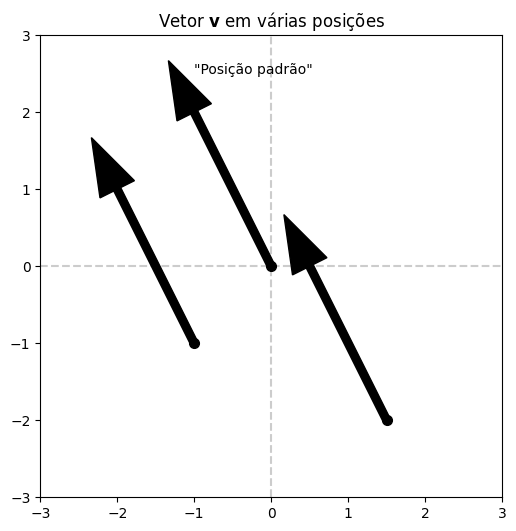

In [80]:
v = np.array([-1,2])

startPos = [
            [0,0],
            [-1,-1],
            [1.5,-2]
            ]

fig = plt.figure(figsize=(6,6))

for s in startPos:

  plt.arrow(s[0],s[1],v[0],v[1],head_width=.5,width=.1,color='black')
  plt.plot(s[0],s[1],'ko',markerfacecolor='k',markersize=7)

  if s==[0,0]:
    plt.text(v[0],v[1]+.5,'"Posição padrão"')


# add axis lines
plt.plot([-3,3],[0,0],'--',color=[.8,.8,.8],zorder=-1)
plt.plot([0,0],[-3,3],'--',color=[.8,.8,.8],zorder=-1)

# make the plot look nicer
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('')
plt.ylabel('')
plt.title('Vetor $\mathbf{v}$ em várias posições');

Um vetor está em **posição padrão** quando parte da origem do sistema de coordenadas.

---

A interpretação geométrica de vetores é amplamente utilizada na física e na engenharia (por exemplo, para representar forças), enquanto a interpretação algébrica é muito comum na ciência de dados (como armazenar as vendas ao longo do tempo, por exemplo).

Normalmente, os conceitos de Álgebra Linear são ensinados graficamente em 2D e, em seguida, estendidos para mais dimensões usando ferramentas algébricas.

## Operação em Vetores

### Adição em dois vetores

Para somar dois vetores, basta somar os elementos correspondentes:

$$
\begin{bmatrix}
4 \\
5 \\
6
\end{bmatrix}
+
\begin{bmatrix}
10 \\
20 \\
30
\end{bmatrix}
=
\begin{bmatrix}
14 \\
25 \\
36
\end{bmatrix}
$$

In [38]:
v = np.array([4,5,6])
w = np.array([10,20,30])

v+w

array([14, 25, 36])

A subtração funciona da mesma forma

$$
\begin{bmatrix}
4 \\
5 \\
6
\end{bmatrix}
-
\begin{bmatrix}
10 \\
20 \\
30
\end{bmatrix}
=
\begin{bmatrix}
-6 \\
-15 \\
-24
\end{bmatrix}
$$

In [19]:
v = np.array([4,5,6])
w = np.array([10,20,30])

v-w

array([[ -6, -15, -24]])

A adição (ou subtração) de vetores só pode ser realizada entre vetores com a mesma dimensionalidade.

In [16]:
u = np.array([1,2])

v+u

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

É possível realizar a adição entre vetores com diferentes orientações no Python, porém o resultado será uma matriz.

In [20]:
v = np.array([[4,5,6]])
w = np.array([[10,20,30]]).T

v+w

array([[14, 15, 16],
       [24, 25, 26],
       [34, 35, 36]])

O NumPy implementa uma operação chamada de broadcasting.

#### Geometria da adição e subtração de vetores

Para somar dois vetores geometricamente, posiciona-se o segundo vetor de modo que sua origem coincida com a extremidade do primeiro. O vetor resultante da soma é aquele que vai da origem do primeiro vetor até a extremidade do segundo.

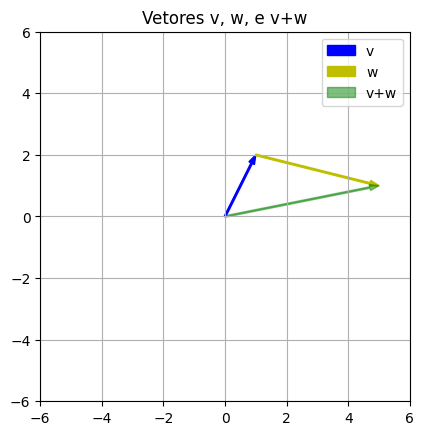

In [31]:
v = np.array([1, 2])
w = np.array([4, -1])


plt.arrow(0, 0, 
          v[0], v[1], 
          head_width=.2,
          width=.05,
          color='b',
          label='v',
          length_includes_head=True)

plt.arrow(v[0], v[1], 
          w[0], w[1], 
          head_width=.2,
          width=.05,
          color='y',
          label='w',
          length_includes_head=True)

plt.arrow(0, 0, 
          v[0]+w[0], v[1]+w[1], 
          head_width=.2,
          width=.05,
          color='g',
          alpha=.5,
          label='v+w',
          length_includes_head=True)

# Adicionando o grid
plt.grid()

plt.axis('square')
plt.axis([-6,6,-6,6])
plt.xlabel('')
plt.ylabel('')
plt.title('Vetores v, w, e v+w')
plt.legend();

A subtração é um pouco diferente, mas igualmente direta: alinhe os dois vetores de modo que suas origens coincidam. O vetor resultante da subtração é aquele que vai da extremidade do vetor subtraído até a extremidade do vetor do qual se está subtraindo.

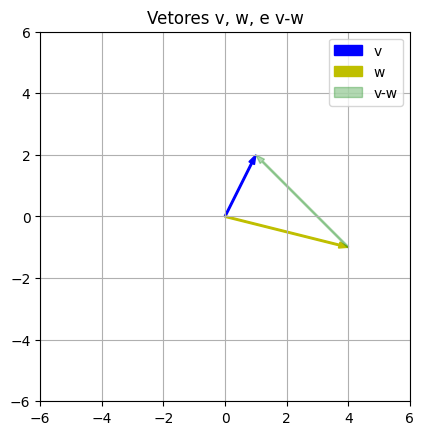

In [32]:
plt.arrow(0, 0, 
          v[0], v[1], 
          head_width=.2,
          width=.05,
          color='b',
          label='v',
          length_includes_head=True)

plt.arrow(0, 0, 
          w[0], w[1], 
          head_width=.2,
          width=.05,
          color='y',
          label='w',
          length_includes_head=True)

plt.arrow(w[0], w[1], 
          v[0]-w[0], v[1]-w[1], 
          head_width=.2,
          width=.05,
          color='g',
          alpha=.3,
          label='v-w',
          length_includes_head=True)

plt.grid()

plt.axis('square')
plt.axis([-6,6,-6,6])
plt.xlabel('')
plt.ylabel('')
plt.title('Vetores v, w, e v-w')
plt.legend();

A geometria da subtração de vetores é muito importante, pois é a base da decomposição de vetores ortogonais, que, por sua vez, é a base dos mínimos quadrados lineares.

### Multiplicação vetor-escalar

Um escalar na Álgebra Linear é simplesmente um número — ou seja, não é um vetor nem uma matriz.

Geralmente, representamos escalares com letras gregas, como $\alpha$, $\beta$ ou $\lambda$.
Quando multiplicamos um vetor por um escalar, essa operação é escrita, por exemplo, como $\beta\mathbf{w}$.

A multiplicação escalar-vetor é muito simples: basta multiplicar cada elemento do vetor pelo escalar.

$$
\lambda = 4, \quad \mathbf{w}=\begin{bmatrix} 9 \\ 4 \\ 1 \end{bmatrix}, \quad \lambda\mathbf{w}=\begin{bmatrix} 36 \\ 16 \\ 4 \end{bmatrix}
$$

A multiplicação de um vetor por um escalar é um exemplo onde o tipo de dado importa:

In [34]:
s = 2
a = [3,4,5] # uma lista
b = np.array(a) # uma array

print(f'lista: {s*a}')
print(f'array: {s*b}')

lista: [3, 4, 5, 3, 4, 5]
array: [ 6  8 10]


O asterisco (*) é sobrecarregado, ou seja, seu comportamento depende do tipo de variável.

#### Vetor de zeros

Um vetor que contém apenas zeros é representado pelo zero em negrito, $\mathbb{0}$, e é um vetor especial na álgebra linear. Usar um vetor de zeros para resolver um problema é frequentemente chamado de solução trivial e geralmente é descartado.

### Adição escalar-vetor

Adicionar um escalar a vetores não é formalmente definido em álgebra linear: eles são dois tipos distintos de objetos matemáticos e não podem ser combinados dessa forma. Porém, em programas de processamento numérico, como o Python, podemos adicionar escalares a vetores como se fosse uma multiplicação:

In [35]:
s = 2
v = np.array([3,4,5])

s+v

array([5, 6, 7])

#### A geometria da multiplicação de vetores escalares

O motivo de os "escalares" se chamarem assim é porque eles escalam os vetores, ou seja, alteram o seu comprimento (magnitude) sem mudar sua direção.

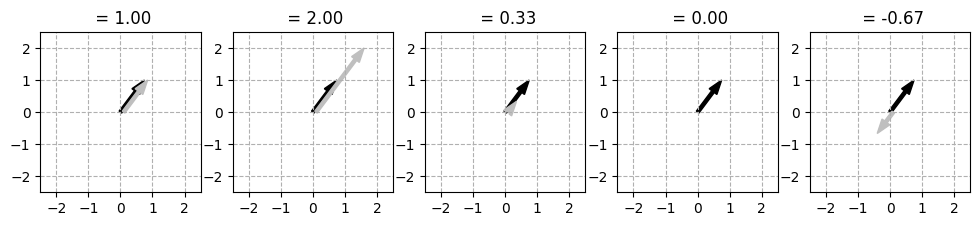

In [37]:
scalars = [ 1, 2, 1/3, 0, -2/3 ]
baseVector = np.array([ .75,1 ])

fig,axs = plt.subplots(1,len(scalars),figsize=(12,3))

i = 0

for s in scalars:
  v = s*baseVector

  axs[i].arrow(0,0,baseVector[0],baseVector[1],head_width=.3,width=.1,color='k',length_includes_head=True)
  axs[i].arrow(.1,0,v[0],v[1],head_width=.3,width=.1,color=[.75,.75,.75],length_includes_head=True)
  axs[i].grid(linestyle='--')
  axs[i].axis('square')
  axs[i].axis([-2.5,2.5,-2.5,2.5])
  axs[i].set(xticks=np.arange(-2,3), yticks=np.arange(-2,3))
  axs[i].set_title(f' = {s:.2f}')
  i+=1

---

A adição vetorial, em combinação com a multiplicação vetor-escalar, leva diretamente ao cálculo da média vetorial. A média vetorial é análoga à média numérica: soma-se os vetores e divide-se pelo número de elementos.

Por exemplo, para calcular a média de dois vetores: some-os e multiplique o resultado por 0,5.

### Transposta

Converta a coluna de vetores em uma linha de vetores e vice-versa.

Uma matriz tem linhas e colunas, portanto, cada elemento da matriz é identificado por um índice (linha, coluna). A transposta apenas troca esses índices:

$$
m^T_{i,j} = m_{j,i}
$$

Vetores têm apenas uma linha ou coluna, dependendo da sua orientação.

In [42]:
v = np.array([[3,4,5]])

print('Vetor original:\n', v)
print('')
print('Vetor transposto:\n', v.T)

Vetor original:
 [[3 4 5]]

Vetor transposto:
 [[3]
 [4]
 [5]]


### Broadcasting de vetores em python

Broadcasting é uma operação que existe na álgebra linear moderna, especialmente em contextos computacionais.

Broadcasting significa repetir uma operação múltiplas vezes entre um vetor e cada elemento de outro vetor.

$$
\begin{bmatrix}
1 & 1
\end{bmatrix}
+
\begin{bmatrix}
10 & 20
\end{bmatrix} \\
\begin{bmatrix}
2 & 2
\end{bmatrix}
+
\begin{bmatrix}
10 & 20
\end{bmatrix} \\
\begin{bmatrix}
3 & 3
\end{bmatrix}
+
\begin{bmatrix}
10 & 20
\end{bmatrix} \\
$$

Perceba o padrão nos vetores. Conseguimos implementar esse conjunto de equações de forma compacta, condensando esses padrões em vetores $\begin{bmatrix}1 & 2 & 3\end{bmatrix} $ e $ \begin{bmatrix}10 & 20\end{bmatrix} $, e então realizar a adição de forma eficiente.

In [43]:
v = np.array([[1, 2, 3]]).T # vetor coluna
w = np.array([[10, 20]]) # vetor linha

v+w

array([[11, 21],
       [12, 22],
       [13, 23]])

## Magnitude do Vetor e Vetores Unitários

A magnitude de um vetor — também chamada de comprimento geométrico ou norma — é a distância da origem ao final do vetor e é calculada usando a fórmula padrão da distância Euclidiana: a raiz quadrada da soma dos quadrados dos elementos do vetor. A magnitude de um vetor é indicada usando duas barras verticais em torno do vetor: $\begin{Vmatrix} \mathbf{v} \end{Vmatrix}$

$$
\begin{Vmatrix} \mathbf{v} \end{Vmatrix}
=
\sqrt{\sum^n_{i=1}v^2_i}
$$

Algumas aplicações usam a magnitude ao quadrado ($\begin{Vmatrix} \mathbf{v} \end{Vmatrix}^2$)

In [45]:
v = np.array([1, 2, 3, 7, 8, 9])

v_mag = np.linalg.norm(v) # magnitude do vetor

print('Magnitude do vetor: ', v_mag)

Magnitude do vetor:  14.422205101855956


Há algumas aplicações em que queremos um vetor com uma distância geométrica de 1, chamado de vetor unitário. Um vetor unitário é definido como $\begin{Vmatrix} \mathbf{v} \end{Vmatrix}=1$.

Qualquer vetor não-unitário tem um vetor unitário associado. Isso significa que podemos criar um vetor unitário na mesma direção de um vetor não-unitário. Para isso, você simplesmente multiplica o vetor pelo escalar da norma recíproca:
$$
\hat{\mathbf{v}}= \frac{1}{\begin{Vmatrix} \mathbf{v} \end{Vmatrix}}.\mathbf{v}
$$

## O produto escalar vetorial

O produto escalar (também chamado de produto interno) é uma das operações mais importantes em toda a álgebra linear. Existem várias formas de indicar o produto escalar; a mais comum é $\mathbf{a}^T\mathbf{b}$, mas em outros contextos podemos ver $\mathbf{a}.\mathbf{b}$ ou $\left\langle\begin{matrix}a , b\end{matrix}\right\rangle$

O produto escalar é um número único que fornece informações sobre o relacionamento entre dois vetores.

Para calcular o produto escalar, você multiplica os elementos correspondentes de dois vetores e então soma todos os produtos individuais.

$$
\delta = \sum^n_{i=1}a_ib_i \\

\begin{align*}
\begin{bmatrix}1 & 2 & 3 & 4\end{bmatrix}.
\begin{bmatrix}5 & 6 & 7 & 8\end{bmatrix} & =
1.5 + 2.6 + 3.7 + 4.8 \\
& = 5 + 12 + 21 + 32 \\
& = 70
\end{align*}
$$

*Só é valido para vetores com a mesma dimensionalidade*

In [49]:
v = np.array([1, 2, 3, 4])
w = np.array([5, 6, 7, 8])

print('Produto escalar:', np.dot(v,w))

Produto escalar: 70


O produto escalar pode ser interpretado como uma medida de similaridade ou mapeamento entre dois vetores. Ele nos dá uma ideia de quão "alinhados" ou "semelhantes" são os vetores em termos de direção.

### O produto escalar é distributivo

Isso significa que:
$$
a^T(b+c) = a^Tb+a^Tc
$$

## Geometria do produto escalar

Há também uma definição geométrica para o produto escalar, que é o produto da magnitude dos dois vetores, escalonado pelo cosseno do ângulo entre eles.

$$
\alpha=\cos(\theta_{v,w})
\begin{Vmatrix} \mathbf{v} \end{Vmatrix} 
\begin{Vmatrix} \mathbf{w} \end{Vmatrix}
$$

Perceba que as magnitudes dos vetores são quantidades estritamente positivas, enquanto o cosseno de um ângulo pode assumir valores entre -1 e +1. Isso significa que o sinal do produto escalar é determinado pelo relacionamento geométrico entre os dois vetores.

>Vetores ortogonais tem um produto escalar de 0.

## Outras multiplicações de vetores

### Multiplicação de Hadamard

Cada elemento correspondente nos dois vetores é multiplicado:

$$
\begin{bmatrix}
5 \\
4 \\
8 \\
2
\end{bmatrix}
.
\begin{bmatrix}
1 \\
0 \\
0.5 \\
-1
\end{bmatrix}
=
\begin{bmatrix}
5 \\
0 \\
4 \\
-2
\end{bmatrix}
$$

No Python, podemos usar o asterisco. É uma maneira conveniente de realizar várias multiplicações escalares.

In [50]:
v = np.array([5, 4, 8, 2])
w = np.array([1, 0, 0.5, -1])

v*w

array([ 5.,  0.,  4., -2.])

### Produto Externo

O produto externo é uma forma de criar uma matriz a partir de um vetor coluna e um vetor linha.

$$
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}
\begin{bmatrix}
d &
e 
\end{bmatrix}
=
\begin{bmatrix}
ad & ae \\
bd & be \\
cd & ce
\end{bmatrix}
$$

O produto externo, diferente do produto escalar, aceita vetores de dimensionalidade diferente. Ele é indicado por $\mathbf{vw}^T$

## Decomposição de vetor ortogonal

Decompor um vetor ou matriz significa dividir essa matriz em várias partes mais simples. Decomposições são usadas para revelar informações ocultas na matriz, facilitando seu trabalho ou permitindo a compressão de dados.

A decomposição de vetores ortogonais nos leva ao procedimento de Gram-Schmidt, que transforma um conjunto de vetores lineares em um conjunto ortogonal ou ortonormal. Um caso específico de decomposição ortogonal é a decomposição QR, onde uma matriz é decomposta na multiplicação de uma matriz ortogonal $Q$ e uma matriz triangular superior $R$.

Essas decomposições são particularmente úteis em problemas de álgebra linear, como na resolução de sistemas lineares e na análise de dados.

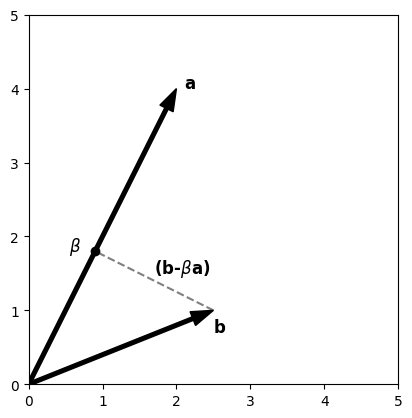

In [ ]:
a = np.array([2, 4])
b = np.array([2.5, 1])

mag = np.dot(a,b) / np.dot(a,a)

c = b-mag*a

plt.arrow(0, 0, 
          a[0], a[1], 
          head_width=.2,
          width=.05,
          color='k',
          label='v',
          length_includes_head=True)

plt.arrow(0, 0, 
          b[0], b[1], 
          head_width=.2,
          width=.05,
          color='k',
          label='w',
          length_includes_head=True)


plt.plot(mag*a[0],
         mag*a[1],
         'ko')

plt.plot([b[0], mag*a[0]], 
          [b[1], mag*a[1]],
          'k--',
          alpha=.5)

plt.text(a[0]+.1,a[1],'a',fontweight='bold',fontsize=12)
plt.text(b[0],b[1]-.3,'b',fontweight='bold',fontsize=12)
plt.text(mag*a[0]-.35,mag*a[1],r'$\beta$',fontweight='bold',fontsize=12)
plt.text((b[0]+mag*a[0])/2,(b[1]+mag*a[1])/2+.1,r'(b-$\beta$a)',fontweight='bold',fontsize=12)

plt.axis('square')
plt.axis([0,5,0,5]);

Na figura acima, temos dois vetores: $a$ e $b$. Queremos decompor $b$ em duas partes:

- uma componente ao longo da direção de $a$, dada por $\beta a$,

- e uma componente ortogonal a $a$, dada por $b- \beta a$.

A projeção de $b$ sobre $a$ é o ponto marcado por $\beta$, que representa o vetor $\beta a$. A linha pontilhada indica o vetor ortogonal $b- \beta a$, que é perpendicular a $a$. 

Podemos determinar $\beta$ exigindo que essa parte ortogonal seja, de fato, perpendicular a $a$. Isso nos leva à seguinte equação:

$$
\mathbf{a}^T(\mathbf{b}-\beta\mathbf{a}) = 0
$$

Resolvendo para $\beta$:

$$
\begin{align*}
\mathbf{a}^T\mathbf{b} - \beta\mathbf{a}^T\mathbf{a} &= 0 \\
\beta\mathbf{a}^T\mathbf{a} &= \mathbf{a}^T\mathbf{b} \\
\beta &= \frac{\mathbf{a}^T\mathbf{b}}{\mathbf{a}^T\mathbf{a}}
\end{align*}
$$

Esse valor de $\beta$ nos permite construir a projeção de $b$ sobre $a$. O vetor $b- \beta a$ é então ortogonal a $a$, e essa ideia está no coração do processo de ortogonalização de Gram-Schmidt, que transforma um conjunto de vetores em uma base ortogonal.

---

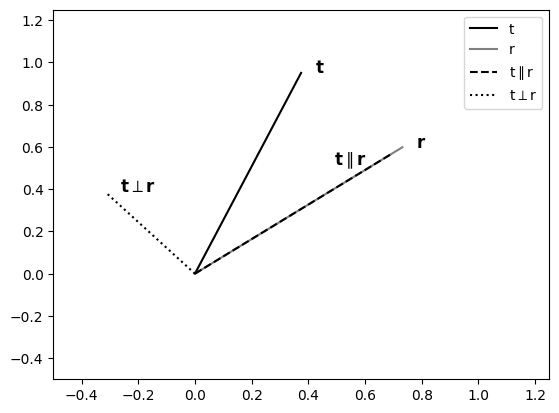

In [79]:
np.random.seed(42)

t = np.random.rand(2)
r = np.random.rand(2)

plt.plot([0,t[0]],
         [0,t[1]],
         'k',
         label='t')

plt.plot([0,r[0]],
         [0,r[1]],
         'gray',
         label='r')

mag = np.dot(t,r) / np.dot(r,r)
t1 = r*mag

plt.plot([0,t1[0]],
         [0,t1[1]],
         'k--',
         label='t$\parallel$r')

t2 = t - t1

plt.plot([0,t2[0]],
         [0,t2[1]],
         'k:',
         label='t$\perp$r')


plt.text(t[0]+.05,t[1],'t',fontweight='bold',fontsize=12)
plt.text(r[0]+.05,r[1],'r',fontweight='bold',fontsize=12)
plt.text(t1[0]-.2,t1[1]-0.05,'t$\parallel$r',fontweight='bold',fontsize=12)
plt.text(t2[0]+.05,t2[1],'t$\perp$r',fontweight='bold',fontsize=12)


plt.legend()
plt.axis([-0.5,1.25,-0.5,1.25]);

**Componente perpendicular:**
$$
\begin{align*}
t &= t\perp r + t \parallel r \\
t\perp r &= t - t \parallel r
\end{align*}
$$

**Componente paralela**:
$$
t \parallel r = r. \frac{t^Tr}{r^Tr}
$$

## Referência

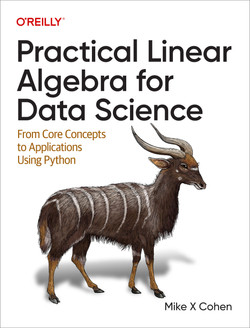

https://www.oreilly.com/library/view/practical-linear-algebra/9781098120603/